**Laboration 3 baserad på uppgift 6.2 i boken "Deep Learning with Python" av Francois Chollet**

Ett SimpleRNN (RNN) kan arbeta på två olika sätt (modes), antingen så returnerar det hela sekvensen av successiv utdata för varje tidpunkt dvs om argumentet ""return_sequences" sätts till "True"  så returneras en 3D Tensor innehållande "batch_size", "timesteps" och "output_features". Sätts argumentet till "False" så redovisas enbart den sista utdatan för varje indatasekvens i form av en 2D Tensor innehållande "batch_size" och "output_features".  Antalet parametrar i den resulterande modellen förändras inte. 

I denna uppgift skapas ett RNN som är väldigt litet. Det presterar inte särskilt väl med 85% ("maxlen"=500) och 84% ("maxlen"=750) i "validation accuracy", jämfört med baslinjen på 88% 
i "test accuracy" när samma dataset använts i tidigare kapitel än 6.2 i Chollets bok.En del av problemet är att i denna uppgift så övevägs bara de första 500 orden vilka sedan ökas till 750 dvs. "maxlen", istället för hela sekvenser, vilket innebär att detta RNN har tillgång till mindre information än de tidigare ansatserna i boken.  Men det går också att konstatera att det SimpleRNN som används i denna uppgiften inte är särskilt bra på att hantera långa sekvenser som text. 

Jag kunde valt att använda funktioner vid förändring av "maxlen" i koden nedan men jag valde istället att ändra detta värde "manuellt". Tydligheten blir lidande men det behöver göras färre förändringar i den ursprungliga koden.  



In [0]:
import keras
keras.__version_

from tensorflow.python import keras
print(keras.__version__)

2.2.4-tf


In [0]:
from keras.layers import SimpleRNN

In [0]:
# Argumentet "return_sequences" är här satt till "True", se ovan kommentar för utförliggare förklaring.

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

W0805 20:28:06.163454 140246519814016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 20:28:06.190489 140246519814016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 20:28:06.195071 140246519814016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Argumentet "return_sequences" är här satt till "False", resultatet blir att utdata är en 3D Tensor. Se ovan kommentar för utförliggare förklaring.

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Argumentet "return_sequences" är här satt till "False", resultatet blir att utdata är en 2D Tensor. Se ovan kommentar för utförliggare förklaring.

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=False))  
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Exemplet 6.2 fortsätter med att beskriva hur det går att öka den representatoriska kraften hos närverket.
# Detta görs genom att stapla ett antal RNN på varandra där alla lagren utom det sista returnerar hela sekvenser.  
# Resultatet är att det sista lagret returnerar bara den sista utdatan precis som ovan där argumentet "return_sequences=False".

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Men vad händer med modellen om vi lägger till argumentet "return_sequences=True"? 
# Resultatet är att utdata från sista lagret blir enligt ovan en 2D Tensor.

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True)) 
model.add(SimpleRNN(32, return_sequences=True))  
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Exemplet fortsätter med att applicera en modell enligt ovan på klassificeringen av filmer på IMDB
# Ursprunlig kod nedan från boken resulterar i ett felsvar vid körning, "Object arrays 
# cannot be loaded when allow_pickle=False' for the load_data() function." Problemet åtgärdades genom 
# att jag nedan sätter "allow_pickle=True". NumPy använder pickle modulen för att spara objekt som inte 
# är standard objekt så om denna parametern är satt till "True" så går det även att spara andra dataformat. 

from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

# "max_features" är antalet ord som skall övervägas som egenskaper.

max_features = 10000

# Först skapade jag modellen med "maxlen=500" och sedan ökade jag till "maxlen=750". Resultatet presenteras längst upp. 

maxlen = 750

# sparar "np.load"

np_load_old = np.load

# Modifierar default parametrarna hos "np.load"

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# Anropar load_data vilket möjliggör "allow_pickle" att implicit sättas till "True"

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Återställer "np.load" för framtida användning

np.load = np_load_old

print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')
print('Pad sequences (samples x time)')
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print('input_train shape:', train_data.shape)
('input_test shape:', test_data.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 750)


('input_test shape:', (25000, 750))

In [0]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

W0805 20:28:15.558526 140246519814016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 20:28:15.580828 140246519814016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 20:28:15.588959 140246519814016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 20:28:15.955290 140246519814016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6512 - acc: 0.5989 - val_loss: 0.5521 - val_acc: 0.7196
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4535 - acc: 0.7972 - val_loss: 0.6031 - val_acc: 0.7336
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.3216 - acc: 0.8675 - val_loss: 0.4222 - val_acc: 0.8066
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2241 - acc: 0.9149 - val_loss: 0.3936 - val_acc: 0.8322
Epoch 5/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1553 - acc: 0.9445 - val_loss: 0.3985 - val_acc: 0.8358
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1166 - acc: 0.9604 - val_loss: 0.4696 - val_acc: 0.8292
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0744 - acc: 0.9753 - val_loss: 0.6544 - val_acc:

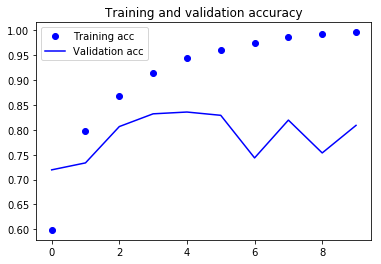

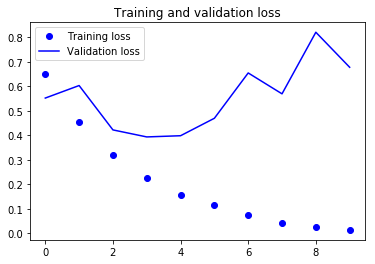

In [0]:
# Visar tränings och validerings "loss" och noggrannhet (accuracy)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

![alt text](https://)